In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
rewards_df = pd.read_csv("../mean_rewards.csv")
rewards_df

,Wall time,Step,Value
0,1.670458e+09,878142,1.093308
1,1.670461e+09,1378142,0.481792
2,1.670464e+09,1878142,1.391960
3,1.670470e+09,2570413,2.274703
4,1.670473e+09,3070413,0.205336
...,...,...,...
223,1.671134e+09,96866874,0.080066
224,1.671136e+09,97366874,3.109063
225,1.671139e+09,97866874,2.069541
226,1.671141e+09,98366874,2.303954


In [46]:
rewards_df = rewards_df.drop_duplicates(subset=["Step"], keep="last")
rewards_df

,Wall time,Step,Value
0,1.670458e+09,878142,1.093308
1,1.670461e+09,1378142,0.481792
2,1.670464e+09,1878142,1.391960
9,1.670491e+09,2570413,1.476466
10,1.670493e+09,3070413,1.419001
...,...,...,...
223,1.671134e+09,96866874,0.080066
224,1.671136e+09,97366874,3.109063
225,1.671139e+09,97866874,2.069541
226,1.671141e+09,98366874,2.303954


In [47]:
rewards_df["Step"].is_monotonic_increasing

False

In [48]:
# rewards_df["Step"] = np.maximum.accumulate(rewards_df["Step"])

# [row for index, row in rewards_df.iterrows()]

# new_df_list = [row for index, row in rewards_df[::-1].iterrows() if index > 0 and row["Step"] > rewards_df["Step"][index - 1]]
# rewards_df = pd.DataFrame(new_df_list)   
# rewards_df 

# prev = arr[-1]
# new = []
# for i in reversed(arr):
#     if i < prev:
#         new.append(i)
#         prev = i
    
prev = rewards_df["Step"].iloc[-1]
print(prev)
row_list = []
for index, row in rewards_df[::-1].iterrows():
    if row["Step"] < prev:
        row_list.append(row)
        prev = row["Step"]
rewards_df = pd.DataFrame(reversed(row_list))
rewards_df.reset_index(inplace=True)
rewards_df

98866874


,index,Wall time,Step,Value
0,0,1.670458e+09,878142.0,1.093308
1,1,1.670461e+09,1378142.0,0.481792
2,2,1.670464e+09,1878142.0,1.391960
3,9,1.670491e+09,2570413.0,1.476466
4,10,1.670493e+09,3070413.0,1.419001
...,...,...,...,...
184,222,1.671132e+09,96366874.0,-0.149202
185,223,1.671134e+09,96866874.0,0.080066
186,224,1.671136e+09,97366874.0,3.109063
187,225,1.671139e+09,97866874.0,2.069541


In [49]:
rewards_df["Step"].is_monotonic_increasing

True

In [50]:
# Add column for which problem setting
settings = ["Setting 1 (deterministic)" if index < 97 else "Setting 2 (stochastic)" for index, _ in rewards_df.iterrows()]
rewards_df.insert(4, "Setting", settings)
rewards_df

,index,Wall time,Step,Value,Setting
0,0,1.670458e+09,878142.0,1.093308,Setting 1 (deterministic)
1,1,1.670461e+09,1378142.0,0.481792,Setting 1 (deterministic)
2,2,1.670464e+09,1878142.0,1.391960,Setting 1 (deterministic)
3,9,1.670491e+09,2570413.0,1.476466,Setting 1 (deterministic)
4,10,1.670493e+09,3070413.0,1.419001,Setting 1 (deterministic)
...,...,...,...,...,...
184,222,1.671132e+09,96366874.0,-0.149202,Setting 2 (stochastic)
185,223,1.671134e+09,96866874.0,0.080066,Setting 2 (stochastic)
186,224,1.671136e+09,97366874.0,3.109063,Setting 2 (stochastic)
187,225,1.671139e+09,97866874.0,2.069541,Setting 2 (stochastic)


c:\Users\ryanb\OneDrive\Documents\Ryan\School\College 4th Year\Reinforcement Learning\Final Project\.venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


[Text(-20000000.0, 0, '-20.0M'),
 Text(0.0, 0, '0.0M'),
 Text(20000000.0, 0, '20.0M'),
 Text(40000000.0, 0, '40.0M'),
 Text(60000000.0, 0, '60.0M'),
 Text(80000000.0, 0, '80.0M'),
 Text(100000000.0, 0, '100.0M'),
 Text(120000000.0, 0, '120.0M')]

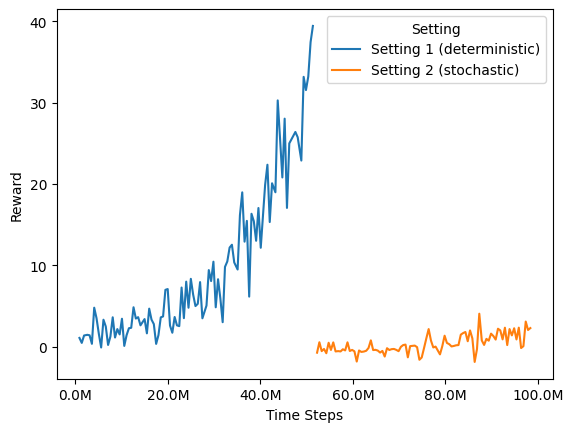

In [51]:
g = sns.lineplot(data=rewards_df, x="Step", y="Value", hue="Setting")
g.set(xlabel='Time Steps', ylabel='Reward')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks() / 1000000]
g.set_xticklabels(xlabels)

In [52]:
no_transfer_df = pd.read_csv("../rewards_no_transfer.csv")
no_transfer_df

,Wall time,Step,Value
0,1.670894e+09,954752,-0.402549
1,1.670896e+09,1454752,-0.597728
2,1.670898e+09,1969785,-0.227242
3,1.670900e+09,2470326,-0.397909
4,1.670903e+09,3452822,-0.445106
...,...,...,...
116,1.671139e+09,62838650,3.348011
117,1.671141e+09,63338650,1.201301
118,1.671143e+09,63838650,0.210244
119,1.671144e+09,64338650,1.527211
